In [5]:
import sys
sys.path.append("..") 

from src.pertdata import PertData

norman = PertData.from_repo("norman", save_dir="../data")

Dataset directory already exists: ../data\norman
Loading dataset: norman


In [6]:
print(norman)
print(norman.adata)

X = norman.adata.X
y_pert = norman.adata.obs["condition"]
y_ctrl = norman.adata.obs["control"]
gene_names = norman.adata.var["gene_name"]

print(f"X.shape={X.shape}")  # type: ignore
print(f"y_pert.shape={y_pert.shape}")
print(f"y_ctrl.shape={y_ctrl.shape}")
print(f"gene_names.shape={gene_names.shape}")

PertData object
    name: norman
    path: ../data\norman
    adata: AnnData object with n_obs x n_vars = 91205 x 5045
AnnData object with n_obs × n_vars = 91205 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'condition_fixed'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'
X.shape=(91205, 5045)
y_pert.shape=(91205,)
y_ctrl.shape=(91205,)
gene_names.shape=(5045,)


In [7]:
filter_mask = ~norman.adata.obs["condition_fixed"].str.contains(r"\+")
indexes_to_keep = filter_mask[filter_mask].index
adata_single = norman.adata[indexes_to_keep].copy()  # type: ignore

print(adata_single)
print(f"Unique perturbations: {len(set(adata_single.obs['condition_fixed']))}")
print("Number of samples per condition:")
print(adata_single.obs["condition_fixed"].value_counts())

AnnData object with n_obs × n_vars = 55760 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'condition_fixed'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'
Unique perturbations: 106
Number of samples per condition:
condition_fixed
ctrl      7353
KLF1      1641
BAK1      1171
CEBPE     1039
ETS2      1031
          ... 
NIT1       165
CDKN1C     165
ZBTB10     145
HES7       122
PLK4        97
Name: count, Length: 106, dtype: int64


In [8]:
# Number of top genes to select.
d = 128

# Compute the gene variances.
gene_variances = adata_single.X.toarray().var(axis=0)  # type: ignore

# Sort the gene variances in descending order and get the indexes of the top d genes.
sorted_indexes = gene_variances.argsort()[::-1]

# Get the indexes of the top d genes.
top_gene_indexes = sorted_indexes[:d]

# Get the gene names of the top d genes.
top_genes = adata_single.var["gene_name"].iloc[top_gene_indexes]

# Get the variances of the top d genes.
top_variances = gene_variances[top_gene_indexes]

# Print the top d genes with the highest variances.
print(f"Top {d} genes with highest variances:")
for gene, variance in zip(top_genes, top_variances):
    print(f"{gene:15}: {variance:.2f}")

# Create a new AnnData object with only the top d genes.
adata_single_top_genes = adata_single[:, top_gene_indexes].copy()

Top 128 genes with highest variances:
HBZ            : 1.69
HIST1H4C       : 1.69
HBG2           : 1.15
HIST1H1C       : 0.85
HBG1           : 0.73
NEAT1          : 0.71
UBE2S          : 0.62
GYPB           : 0.61
MALAT1         : 0.58
TOP2A          : 0.58
VIM            : 0.57
HMGB2          : 0.56
SH3BGRL3       : 0.55
RP11-301G19.1  : 0.53
HIST1H2BJ      : 0.52
CENPF          : 0.49
GAL            : 0.48
MT-ND6         : 0.48
RP11-717F1.1   : 0.47
APOE           : 0.47
PTTG1          : 0.47
CKS1B          : 0.47
CKS2           : 0.46
TUBB           : 0.46
GYPA           : 0.46
KIAA0101       : 0.46
S100A11        : 0.45
PHF19          : 0.44
PSMA4          : 0.44
HNRNPH1        : 0.44
CACYBP         : 0.43
KRT18          : 0.43
BTG1           : 0.43
LDHA           : 0.43
SLC25A37       : 0.42
CFD            : 0.42
AIF1           : 0.42
LGALS1         : 0.41
NME1           : 0.41
HSPA8          : 0.41
BLVRB          : 0.41
HN1            : 0.41
SRM            : 0.41
BIRC5          :

In [22]:
Y = adata_single_top_genes.obs["condition_fixed"]
print(Y.shape)
print(len(Y.unique()))



(55760,)
106


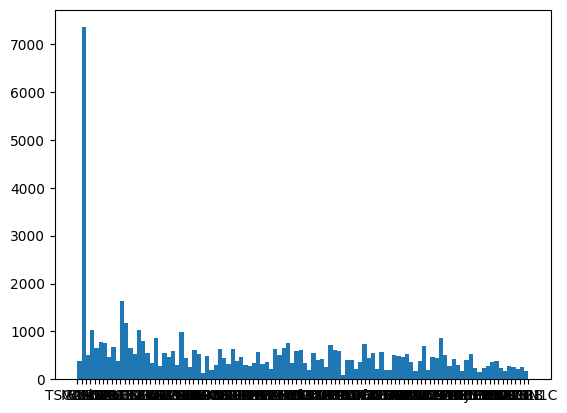

In [11]:
from matplotlib import pyplot as plt
# plot distribution of Y
plt.hist(Y, bins=len(Y.unique()))
plt.show()



In [23]:
numpy_y = Y.to_numpy()
print(numpy_y)


['TSC22D1' 'ctrl' 'MAML2' ... 'CELF2' 'BCORL1' 'MAP4K3']


In [24]:
from collections import Counter

counter = Counter(numpy_y)
print(counter)




Counter({'ctrl': 7353, 'KLF1': 1641, 'BAK1': 1171, 'CEBPE': 1039, 'ETS2': 1031, 'UBASH3B': 983, 'OSR2': 858, 'SLC4A1': 853, 'SET': 790, 'ELMSAN1': 783, 'FOXA1': 761, 'C19orf26': 750, 'MAP2K6': 741, 'FOXF1': 715, 'UBASH3A': 686, 'MEIS1': 682, 'DUSP9': 662, 'MAPK1': 660, 'FEV': 647, 'CNN1': 636, 'MAP7D1': 635, 'RUNX1T1': 631, 'HOXB9': 612, 'DLX2': 606, 'ZBTB1': 602, 'ZBTB25': 590, 'IKZF3': 583, 'PRTG': 581, 'CEBPA': 580, 'TBX2': 564, 'TBX3': 559, 'CLDN6': 544, 'FOXL2': 544, 'ZNF318': 541, 'CBL': 538, 'TGFBR2': 537, 'CBFA2T3': 531, 'KIF2C': 518, 'MAML2': 508, 'IGDCC3': 507, 'SPI1': 506, 'FOSB': 502, 'ISL2': 485, 'AHR': 479, 'COL2A1': 474, 'BCL2L11': 463, 'TMSB4X': 462, 'MAP2K3': 458, 'BCORL1': 456, 'S1PR2': 446, 'SGK1': 446, 'SLC6A9': 441, 'ZC3HAV1': 436, 'SAMD1': 430, 'CEBPB': 422, 'CDKN1B': 413, 'FOXA3': 409, 'ARRDC3': 405, 'BPGM': 393, 'CELF2': 388, 'SNAI1': 380, 'GLB1L2': 378, 'TSC22D1': 376, 'CNNM4': 376, 'PTPN9': 363, 'LYL1': 360, 'PTPN12': 358, 'CSRNP1': 354, 'HOXC13': 343, 'LHX1':

In [15]:
min_threshold = 300

Y = adata_single.obs["condition_fixed"].apply(lambda x: x if counter[x] >= min_threshold else "other")

print(Y.shape)
print(len(Y.unique()))




(55760,)
77


In [16]:
print(Y)

cell_barcode
AAACCTGAGGCATGTG-1    TSC22D1
AAACCTGCACGAAGCA-1       ctrl
AAACCTGCAGCCTTGG-1      MAML2
AAACCTGCATCTCCCA-1      CEBPE
AAACCTGGTATAATGG-1       ctrl
                       ...   
TTTGTCAGTCAGAATA-8       ctrl
TTTGTCATCAGTACGT-8      FOXA3
TTTGTCATCCACTCCA-8      CELF2
TTTGTCATCCCAACGG-8     BCORL1
TTTGTCATCTGGCGAC-8      other
Name: condition_fixed, Length: 55760, dtype: object


In [25]:
condition_group_map = {
    # Đối chứng
    'ctrl': 'Control',
    
    # 1) Transcription Factors (TF) hoặc Co-regulators
    'KLF1': 'TranscriptionFactor',
    'CEBPE': 'TranscriptionFactor',
    'ETS2': 'TranscriptionFactor',
    'FOXA1': 'TranscriptionFactor',
    'OSR2': 'TranscriptionFactor',       # odd-skipped related 2
    'FOXF1': 'TranscriptionFactor',
    'MEIS1': 'TranscriptionFactor',
    'FEV': 'TranscriptionFactor',
    'RUNX1T1': 'TranscriptionFactor',    # đối tác của RUNX1 (AML1)
    'HOXB9': 'TranscriptionFactor',
    'DLX2': 'TranscriptionFactor',
    'ZBTB1': 'TranscriptionFactor',
    'ZBTB25': 'TranscriptionFactor',
    'IKZF3': 'TranscriptionFactor',      # Ikaros family
    'CEBPA': 'TranscriptionFactor',
    'TBX2': 'TranscriptionFactor',
    'TBX3': 'TranscriptionFactor',
    'FOXL2': 'TranscriptionFactor',
    'ZNF318': 'TranscriptionFactor',     # Zinc finger
    'CBFA2T3': 'TranscriptionFactor',    # corepressor (RUNX1 fusion)
    'SPI1': 'TranscriptionFactor',
    'FOSB': 'TranscriptionFactor',       # FOS family
    'ISL2': 'TranscriptionFactor',       # ISL LIM homeobox 2
    'AHR': 'TranscriptionFactor',
    'CEBPB': 'TranscriptionFactor',
    'SNAI1': 'TranscriptionFactor',
    'IRF1': 'TranscriptionFactor',
    'EGR1': 'TranscriptionFactor',
    'POU3F2': 'TranscriptionFactor',
    'LYL1': 'TranscriptionFactor',
    'JUN': 'TranscriptionFactor',
    'HOXA13': 'TranscriptionFactor',
    'HOXC13': 'TranscriptionFactor',
    'RHOXF2BB': 'TranscriptionFactor',   # Rhox homeobox
    'PRDM1': 'TranscriptionFactor',      # BLIMP1
    'CITED1': 'TranscriptionFactor',     # Coactivator for TFs
    'CSRNP1': 'TranscriptionFactor',     # cysteine-serine-rich nuclear protein
    'LHX1': 'TranscriptionFactor',       # LIM homeobox
    'TP73': 'TranscriptionFactor',       # p53 family
    'HNF4A': 'TranscriptionFactor',
    'FOXO4': 'TranscriptionFactor',      # FOXO
    'HES7': 'TranscriptionFactor',       # Hairy and Enhancer of Split
    'MAML2': 'TranscriptionFactor',      # Mastermind-like (Notch coactivator)
    'ZBTB10': 'TranscriptionFactor',     # zinc finger and BTB domain containing
    
    # 2) Apoptosis Regulators
    'BAK1': 'ApoptosisRegulator',
    'BCL2L11': 'ApoptosisRegulator',     # BIM
    
    # 3) MAPK Pathway (kinases, upstream/downstream)
    'MAP2K6': 'MAPKPathway',
    'MAPK1': 'MAPKPathway',
    'MAP2K3': 'MAPKPathway',
    'MAP4K5': 'MAPKPathway',
    'MAP4K3': 'MAPKPathway',
    
    # 4) Phosphatases (PTP, DUSP, UBASH3…)
    'DUSP9': 'Phosphatase',             
    'PTPN9': 'Phosphatase',
    'PTPN12': 'Phosphatase',
    'PTPN1': 'Phosphatase',
    'PTPN13': 'Phosphatase',
    'UBASH3B': 'Phosphatase',            # TULA2
    'UBASH3A': 'Phosphatase',            # TULA
    # (Lưu ý: UBASH3 cũng được gọi là STS phosphatase - có thể xếp "SignalingRegulator")
    
    # 5) Chromatin Remodeling / Epigenetics
    'SET': 'ChromatinRemodeling',
    'ELMSAN1': 'ChromatinRemodeling',
    'KMT2A': 'ChromatinRemodeling',      # MLL1 histone methyltransferase
    'ARID1A': 'ChromatinRemodeling',     # thành phần SWI/SNF
    'SAMD1': 'ChromatinRemodeling',      # sterile alpha motif domain, có thể liên quan epigenetics
    
    # 6) Cell Cycle / Proliferation / Mitosis
    'KIF2C': 'CellCycleRegulator',
    'CDKN1B': 'CellCycleRegulator',
    'STIL': 'CellCycleRegulator',        # liên quan phân bào (centriole duplication)
    'CKS1B': 'CellCycleRegulator',
    'CDKN1A': 'CellCycleRegulator',      # p21
    'CDKN1C': 'CellCycleRegulator',      # p57
    'PLK4': 'CellCycleRegulator',
    
    # 7) Signaling Regulators (Receptors, kinases ngoài MAPK, TF modulators,…)
    'SGK1': 'SignalingRegulator',        # Serum/glucocorticoid-regulated kinase
    'S1PR2': 'SignalingRegulator',       # Sphingosine-1-phosphate receptor
    'ARRDC3': 'SignalingRegulator',      # arrestin domain
    'TGFBR2': 'SignalingRegulator',      # TGF-beta receptor
    'RREB1': 'TranscriptionFactor',      # (cũng có vai trò TF, có thể xếp TF hoặc SignalingRegulator)
    'IGDCC3': 'SignalingRegulator',      # Ig superfamily domain
    'CBL': 'SignalingRegulator',         # E3 ubiquitin ligase (RING finger)
    
    # 8) Transporters / Channels
    'SLC4A1': 'Transporter',
    'SLC6A9': 'Transporter',
    'SLC38A2': 'Transporter',
    'CNNM4': 'Transporter',              # cyclin M4, Mg transporter
    'CLDN6': 'Transporter',              # Claudin 6 (tight junction) - cũng có thể xếp "CellAdhesion"
    
    # 9) Metabolism
    'BPGM': 'Metabolism',                # biphosphoglycerate mutase
    'HK2': 'Metabolism',                 # hexokinase 2
    'NIT1': 'Metabolism',                # nitrilase
    'GLB1L2': 'Metabolism',              # beta-galactosidase-like
    
    # 10) Cytoskeleton / Structural
    'CNN1': 'Cytoskeleton',              # calponin
    'MAP7D1': 'Cytoskeleton',            # microtubule-associated
    'TMSB4X': 'Cytoskeleton',            # Thymosin beta-4
    'COL1A1': 'ExtracellularMatrix',     # collagen
    'COL2A1': 'ExtracellularMatrix',     # collagen
    
    # 11) RNA-binding / Post-transcriptional
    'CELF2': 'RNARegulator',             # CUGBP Elav-like family
    'NCL': 'RNARegulator',               # Nucleolin
    
    # 12) Các nhóm nhỏ khác
    'MIDN': 'Unknown',                   # midnolin (chưa rõ, 1 số tài liệu: nuclear protein?)
    'ATL1': 'MembraneTrafficking',       # atlastin GTPase (ER shaping/fusion)
    'SAMD1': 'ChromatinRemodeling',      # (đã xếp ở trên)
    
    # 13) Các gene ít rõ ràng, orf, “hoặc chưa được tra kỹ”
    'C19orf26': 'Other',     
    'C3orf72': 'Other',
    'KIAA1804': 'Other',
    'ZC3HAV1': 'Other',                  # zinc-finger anti-viral protein
    'IGDCC3': 'SignalingRegulator',      # (đã xếp)
    
    # Nếu còn sót gene nào trong danh sách gốc, ta gộp "Other" hoặc "Unknown":
    # (Dưới đây là vài ví dụ còn sót)
    'BCORL1': 'TranscriptionFactor',     # corepressor BCOR
    'MAML2': 'TranscriptionFactor',      # (đã xếp ở TF)
    'SAMD1': 'ChromatinRemodeling',      # (đã xếp)
}

# Các gene chưa liệt kê hết ở trên?
# Ta bổ sung tiếp cho đủ 106 entry. 
# Dưới đây là những gene có trong dict gốc mà chưa gán:
additional_map = {
    'UBASH3B': 'Phosphatase',  # nêu trên
    'UBASH3A': 'Phosphatase',  # nêu trên
    'PRTG': 'Unknown',         # protogenin, 1 số tài liệu: Ig superfamily, neural dev
    'TMSB4X': 'Cytoskeleton',
    'BCORL1': 'TranscriptionFactor', # nêu trên
    'SAMD1': 'ChromatinRemodeling',
    'FOXA3': 'TranscriptionFactor',
    'ARRDC3': 'SignalingRegulator',
    'CNNM4': 'Transporter',
    'PTPN9': 'Phosphatase',
    'LHX1': 'TranscriptionFactor',
    'PTPN1': 'Phosphatase',
    'IER5L': 'Unknown',        # Immediate Early Response 5-like, có thể TF, ít tài liệu
    'RREB1': 'TranscriptionFactor', # or Signaling
    'CDKN1B': 'CellCycleRegulator',
    'TSC22D1': 'TranscriptionFactor', # TSC22 domain family (có thể co-repressor)
    'CCSNP1': 'TranscriptionFactor',  # (typo: CSRNP1?), đã xếp
    'CSRNP1': 'TranscriptionFactor',
    # ...
}

# Gộp hai dict lại (map chính + bổ sung). 
condition_group_map.update(additional_map)

# Kiểm tra cuối cùng: những gene còn thiếu so với dict gốc
# => Mình minh họa trong phần trả lời, hoặc bạn chạy code để dò.




In [26]:
Y = adata_single_top_genes.obs["condition_fixed"].map(condition_group_map).fillna("Other")

print(len(Y.unique()))


16


In [27]:
counter_Y = Counter(Y)
print(counter_Y)




Counter({'TranscriptionFactor': 23497, 'Control': 7353, 'Phosphatase': 3620, 'SignalingRegulator': 2879, 'Transporter': 2494, 'MAPKPathway': 2458, 'ChromatinRemodeling': 2370, 'CellCycleRegulator': 1925, 'Other': 1827, 'Cytoskeleton': 1733, 'ApoptosisRegulator': 1634, 'Metabolism': 1185, 'Unknown': 1164, 'ExtracellularMatrix': 731, 'RNARegulator': 585, 'MembraneTrafficking': 305})


In [28]:
X = adata_single_top_genes.X.toarray()



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

y = Y.to_numpy()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X, y = shuffle(X, y, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [60]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# print number of components
print(f"Number of components: {pca.n_components_}")



Number of components: 103


In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


In [64]:
from xgboost import XGBClassifier
import numpy as np

# y chứa label 0..15 (16 lớp)
class_counts = np.bincount(Y_train)
total_samples = len(Y_train)
num_classes = 16

# Trọng số cho mỗi lớp = total_samples / (num_classes * class_counts[c])
class_weights = {c: total_samples/(num_classes*count) for c, count in enumerate(class_counts)}

# Tạo vector weight cho từng sample
sample_weights = [class_weights[label] for label in Y_train]

# Huấn luyện
model = XGBClassifier(
    objective='multi:softprob',  # hoặc 'multi:softprob'
    num_class=16,
    # ... các hyperparams khác
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
)
model.fit(X_train, Y_train, sample_weight=sample_weights)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=16,
              num_parallel_tree=None, ...)

In [65]:
# accuracy of train set
y_pred = model.predict(X_train)
accuracy = np.mean(y_pred == Y_train)
print(f"Accuracy of train set: {accuracy:.2f}")

# accuracy of test set
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == Y_test)
print(f"Accuracy of test set: {accuracy:.2f}")


Accuracy of train set: 0.61
Accuracy of test set: 0.19


In [49]:
class_weights

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0}

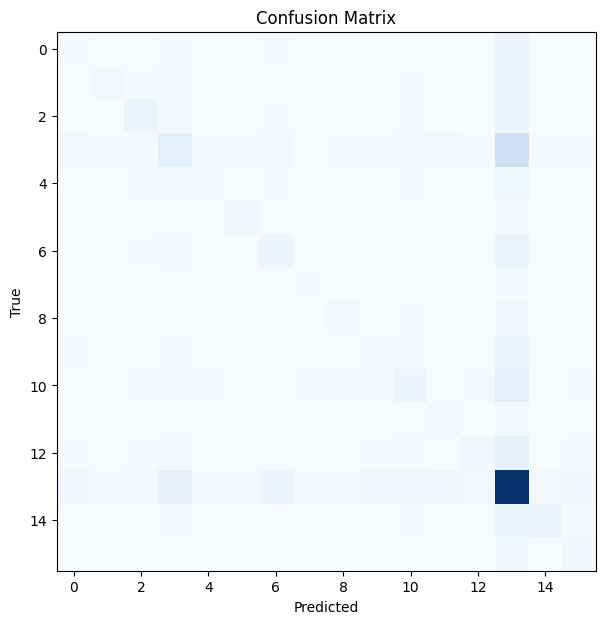

In [52]:

from sklearn.metrics import confusion_matrix

# plot confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [53]:
# f1 score macro
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred, average='macro')



0.29294349140610576